In [1]:
import numpy as np
import googlemaps
import CycleGan
import glob
import imageio
import scipy
import matplotlib.pyplot as plt
import bisect

Using TensorFlow backend.


## Pre Processing

In [2]:
path=".\\data\\Japanese\\"

trainA=glob.glob(path+"trainA\\*.jpg")
trainB=glob.glob(path+"trainB\\*.jpg")

In [3]:
trainA_dim=[]
for i in trainA:
    img=imageio.imread(i)
    trainA_dim.append(img.shape)

Text(0.5, 1.0, 'image dimensions')

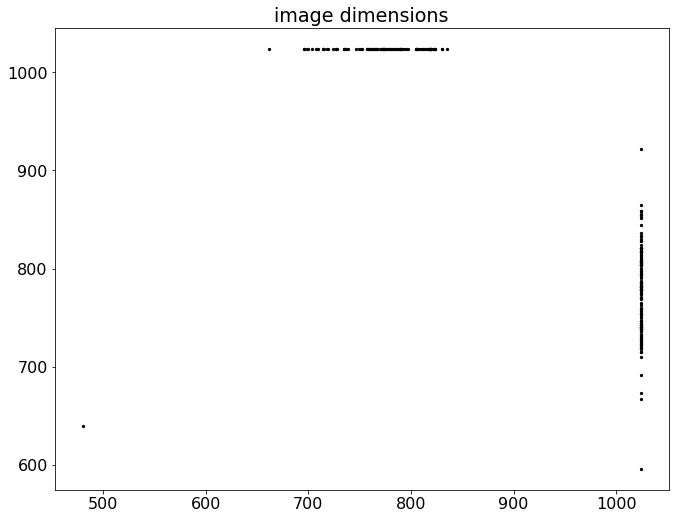

In [4]:
y,x=np.array(trainA_dim)[:,0], np.array(trainA_dim)[:,1]

plt.rcParams.update({'font.size':16})
fig,ax=plt.subplots(1, figsize=[11,8.5])
ax.scatter(x,y, s=5, color='black')
ax.set_title("image dimensions")

In [5]:
trainB_dim=[]
for i in trainB:
    img=imageio.imread(i)
    trainB_dim.append(img.shape)

Text(0.5, 1.0, 'image dimensions')

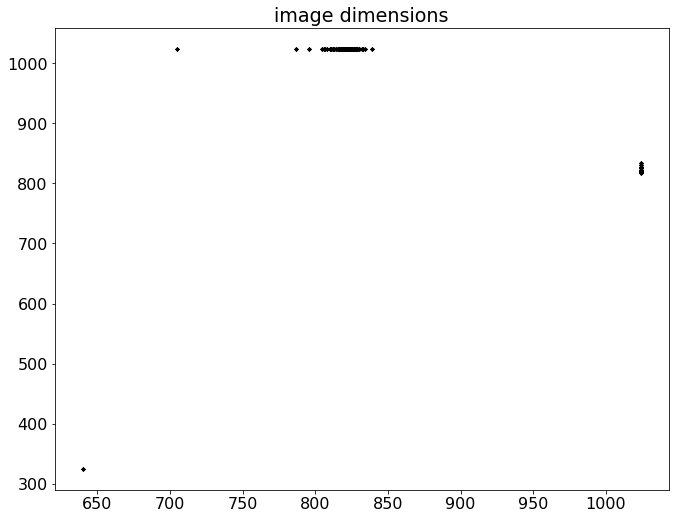

In [6]:
y,x=np.array(trainB_dim)[:,0], np.array(trainB_dim)[:,1]

plt.rcParams.update({'font.size':16})
fig,ax=plt.subplots(1, figsize=[11,8.5])
ax.scatter(x,y, s=5, color='black')
ax.set_title("image dimensions")

trainB's dimensions are less widespread than the trainA. Both training sets seem to favor the number 1024.

In [21]:
from PIL import Image

def preproc_gray(img_path, output_dir,resize=(512,512)):
    img = Image.open(img_path)
    img = np.array(img)
    
    assert len(img.shape)==2
    v,h = img.shape
    
    if (v>resize[0])*(h>resize[1]):
        
        print(img.shape)
        plt.imshow(img)
        plt.show()

        smallest=min(v, h)
        aspect_ratio=v/h
        adjust_ratio=resize[0]/smallest
        print("adjust ratio", adjust_ratio)
        print("v", v)
        print("h", h)
        new_h=round(adjust_ratio*h)
        new_v=round(adjust_ratio*v)
        #print("new_ind2",new_ind2)
        #print("new ind1",new_ind1)
        
        print(type(img))
        img=Image.fromarray(img)
        img=img.resize((new_h,new_v))
        img=np.array(img)
        print('after image resize: ', img.shape)
        plt.imshow(img)
        plt.show()

        #find which is 512
        if new_v==512: # if v is 512
            diff=new_h-512
            img=img[ : , int(0+diff/2) : int(new_h-diff/2) ]
            plt.imshow(img)
            plt.show()

        elif new_h==512: # if ind2 is 512
            diff=new_v-512
            img=np.array(img)[ int(0+diff/2) : int(new_v-diff/2) , : ]
            plt.imshow(img)
            plt.show()
        
        #print(np.array(img).shape)
        
        savename=img_path.split("\\")[-1].split(".")[0]
        #print(savename)
        img=Image.fromarray(img)
        img.save(output_dir + savename  +  ".jpg")

        
        
        
def preproc_RGB(img_path, output_dir,resize=(512,512)):
    img = Image.open(img_path)
    img = np.array(img)
    
    assert len(img.shape)==3
    v,h = img.shape[:2]
    
    if (v>resize[0])*(h>resize[1]):
        
        print(img.shape)
        plt.imshow(img[:,:,0])
        plt.show()

        smallest=min(v, h)
        aspect_ratio=v/h
        adjust_ratio=resize[0]/smallest
        print("adjust ratio", adjust_ratio)
        print("v", v)
        print("h", h)
        new_h=round(adjust_ratio*h)
        new_v=round(adjust_ratio*v)
        #print("new_ind2",new_ind2)
        #print("new ind1",new_ind1)
        
        print(type(img))
        img=Image.fromarray(img)
        img=img.resize((new_h,new_v))
        img=np.array(img)
        print('after image resize: ', img.shape)
        plt.imshow(img)
        plt.show()

        #find which is 512
        if new_v==512: # if v is 512
            diff=new_h-512
            img=img[ : , int(0+diff/2) : int(new_h-diff/2) ,:]
            plt.imshow(img)
            plt.show()

        elif new_h==512: # if ind2 is 512
            diff=new_v-512
            img=np.array(img)[ int(0+diff/2) : int(new_v-diff/2) , : ,:]
            plt.imshow(img)
            plt.show()
        
        #print(np.array(img).shape)
        
        savename=img_path.split("\\")[-1].split(".")[0]
        #print(savename)
        img=Image.fromarray(img)
        img.save(output_dir + savename  +  ".jpg")


In [22]:
if False:
    for i in trainA:
        preproc_gray(i,".\\data\\Japanese\\trainA_preproc\\")

In [46]:
def cut_image(img_path, output_dir ):
    img = Image.open(img_path)
    img = np.array(img)
    
    v,h=img.shape[:2]
    v_scale= 0.15
    h_scale=0.15
    
    img=img[round(v*v_scale) : round(v-v*v_scale)  ,  round(h*h_scale) : round(h-h*h_scale) , :]
    
    savename=img_path.split("\\")[-1].split(".")[0]
    img=Image.fromarray(img)
    img.save(output_dir + savename + ".jpg")

In [47]:
for i in trainB:
    cut_image(i, ".\\data\\Japanese\\trainB_preproc1\\")

(1024, 826, 3)


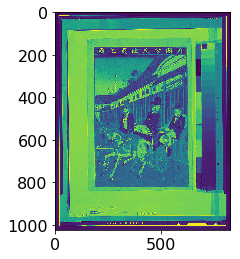

adjust ratio 0.6198547215496368
v 1024
h 826
<class 'numpy.ndarray'>
after image resize:  (635, 512, 3)


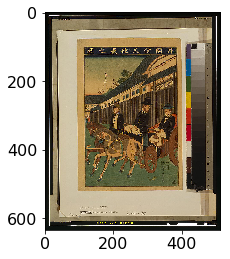

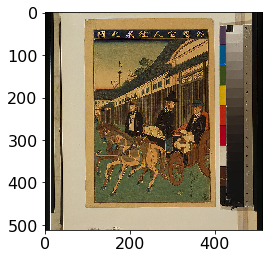

(1024, 826, 3)


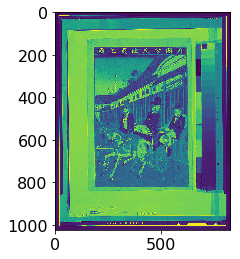

adjust ratio 0.6198547215496368
v 1024
h 826
<class 'numpy.ndarray'>
after image resize:  (635, 512, 3)


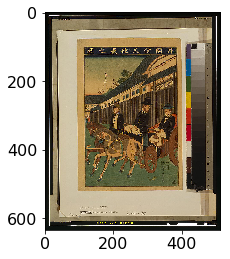

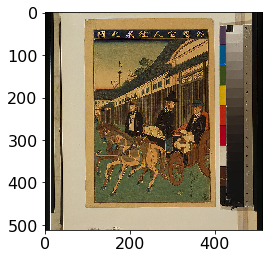

(1024, 830, 3)


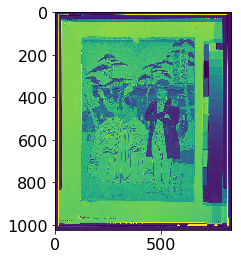

adjust ratio 0.6168674698795181
v 1024
h 830
<class 'numpy.ndarray'>
after image resize:  (632, 512, 3)


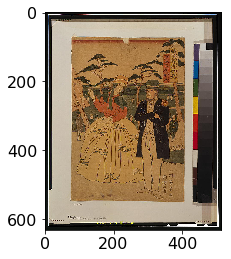

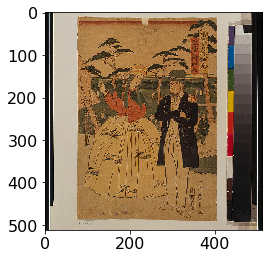

(1024, 810, 3)


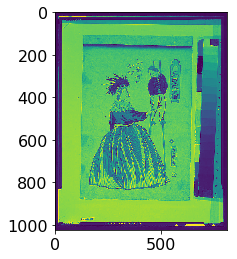

adjust ratio 0.6320987654320988
v 1024
h 810
<class 'numpy.ndarray'>
after image resize:  (647, 512, 3)


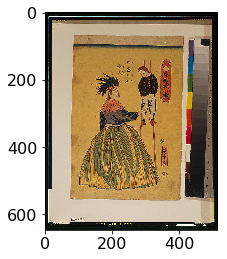

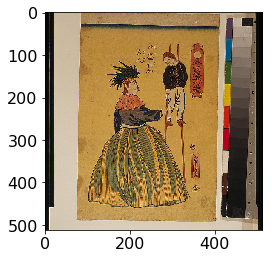

(1024, 812, 3)


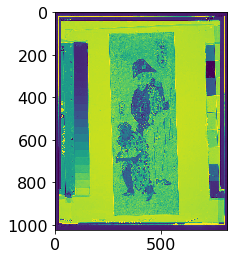

adjust ratio 0.6305418719211823
v 1024
h 812
<class 'numpy.ndarray'>
after image resize:  (646, 512, 3)


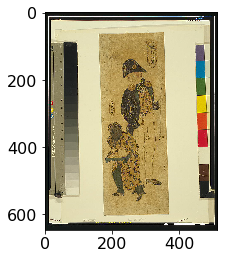

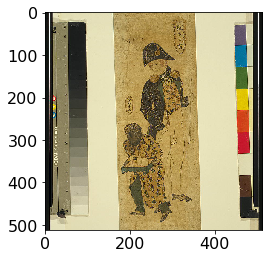

(817, 1024, 3)


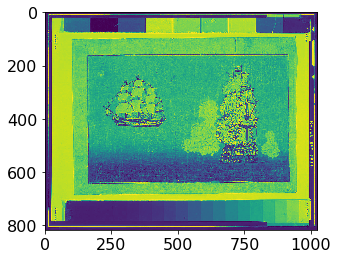

adjust ratio 0.6266829865361077
v 817
h 1024
<class 'numpy.ndarray'>
after image resize:  (512, 642, 3)


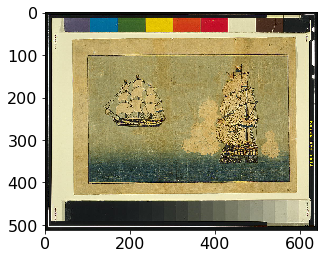

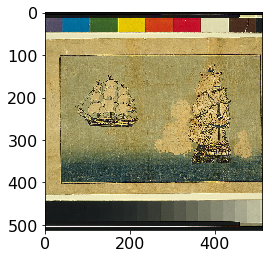

(1024, 824, 3)


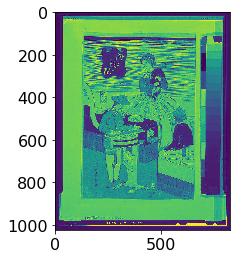

adjust ratio 0.6213592233009708
v 1024
h 824
<class 'numpy.ndarray'>
after image resize:  (636, 512, 3)


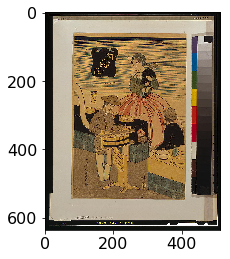

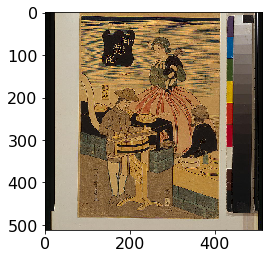

(1024, 822, 3)


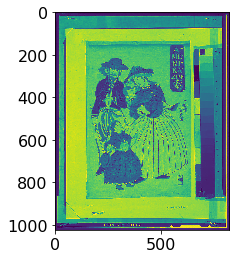

adjust ratio 0.6228710462287105
v 1024
h 822
<class 'numpy.ndarray'>
after image resize:  (638, 512, 3)


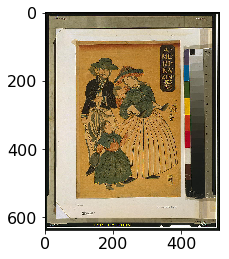

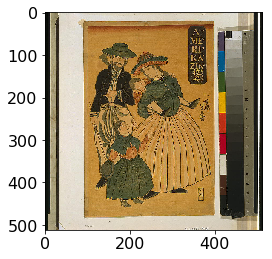

(1024, 808, 3)


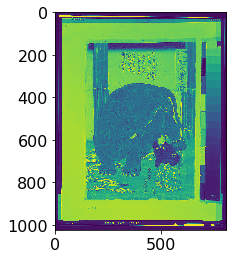

adjust ratio 0.6336633663366337
v 1024
h 808
<class 'numpy.ndarray'>
after image resize:  (649, 512, 3)


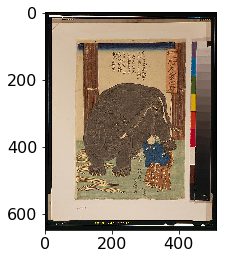

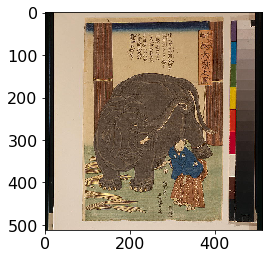

(1024, 825, 3)


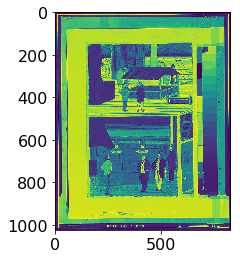

adjust ratio 0.6206060606060606
v 1024
h 825
<class 'numpy.ndarray'>
after image resize:  (636, 512, 3)


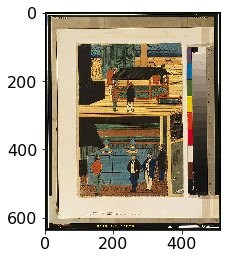

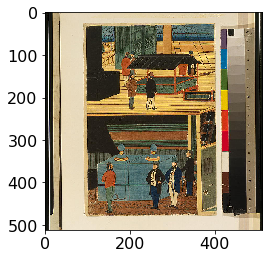

(1024, 820, 3)


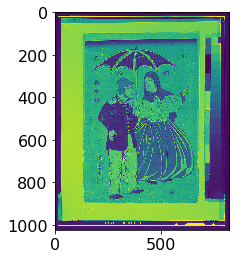

adjust ratio 0.624390243902439
v 1024
h 820
<class 'numpy.ndarray'>
after image resize:  (639, 512, 3)


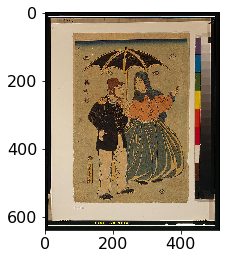

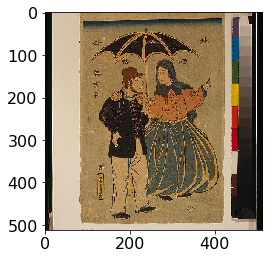

(1024, 830, 3)


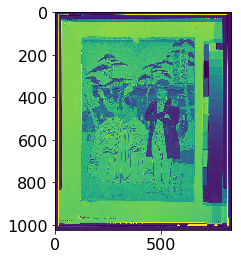

adjust ratio 0.6168674698795181
v 1024
h 830
<class 'numpy.ndarray'>
after image resize:  (632, 512, 3)


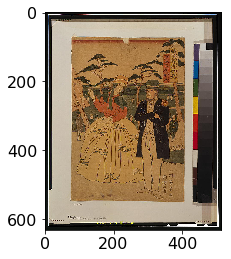

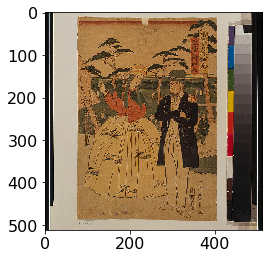

(1024, 822, 3)


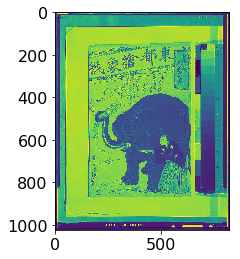

adjust ratio 0.6228710462287105
v 1024
h 822
<class 'numpy.ndarray'>
after image resize:  (638, 512, 3)


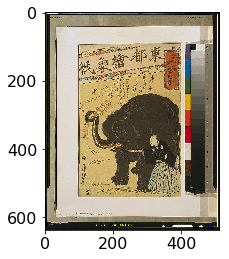

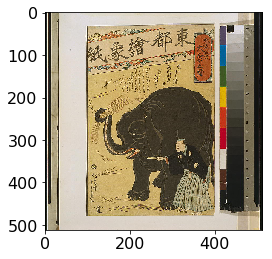

(1024, 811, 3)


KeyboardInterrupt: 

In [16]:
for i in trainB:
    preproc_RGB(i,".\\data\\Japanese\\trainB_preproc\\")